In [2]:
from src import TARS, markets, portfolios, traders, strategies
%matplotlib inline

# Getting Started

Welcome on Tars, the coolest crypto trading bot for research purposes. Here's a great first guide to follow to get accustomed with the different module available in Tars.

We'll get familiar with :

    1. Tars' concepts
    2. the way to make the bot trade 24/7
    3. the tutorials


Have a good read!

---

## Concept

The goal of Tars is to allow developers to create trading strategies with ease. The concept is composed of the following building blocks : 

- market
- portfolio
- trader
- strategy

The idea behind this decomposition is to follow the nature of the trading activity. A **strategy** is used by a **trader** to manage a **portfolio** on a **market**.

When it makes sense, each object has a test version and a real version. So that it's possible to trade without financial risk.

Once you have those four components, you can give them to **Tars** so that he can run them.

### Market object

Allows to get the latest data from the market. Currently, only the cryptocurrency market is available. To get the latest OHLC data for ETHUSD : 

In [26]:
markets.CryptoMarket().get_ohlc_data('XETHZUSD')[0].tail()

,time,open,high,low,close,vwap,volume,count
dtime,,,,,,,,
2021-08-10 09:06:00,1628586360,3168.27,3168.27,3168.01,3168.01,3168.03,1.849335,3
2021-08-10 09:05:00,1628586300,3168.01,3169.31,3168.00,3169.31,3168.38,22.446436,21
2021-08-10 09:04:00,1628586240,3168.61,3169.00,3168.01,3169.00,3168.48,4.254000,9
2021-08-10 09:03:00,1628586180,3167.27,3168.54,3167.27,3168.00,3168.32,13.394770,11
2021-08-10 09:02:00,1628586120,3167.62,3172.07,3167.54,3168.89,3169.36,85.237435,108


### Portfolio object

Represents the portfolio of currencies available for trading. Two objects are at your disposal : 

    - VirtualPortfolio -> for testing purposed
    - CryptoPortfolio -> your real Kraken Exchange portfolio


In [15]:
# Create a virtual portfolio
portfolio = portfolios.VirtualPortfolio(
    {'ZUSD': 1000,
     'XETH': 30}
)

In [19]:
# Get the account balance
portfolio.get_account_balance()

,vol
ZUSD,1000
XETH,30


In [20]:
# Get the total available amount for trading
portfolio.get_trade_balance()

,ZUSD
eb,95736.7


### Trader object

Trader is the object allowing to make orders, cancel them, etc. To create a cryptocurrency trader, you also have two objects: 

    - VirtualCryptoTrader -> for paper trading 
    - CryptoTrader -> connects to Kraken Exchange for real transactions
    

In [27]:
# Create the virtual cryptocurrency trader
trader = traders.VirtualCryptoTrader(portfolio)

In [28]:
# Add an order. Here, buy some ETH 
trader.add_order(
    pair='XETHZUSD', 
    type='buy',
    ordertype='market', 
    volume=0.2,
    validate=True)

VirtualOrder(dtime=Timestamp('2021-08-10 21:03:23.323794+0000', tz='UTC'), pair='XETHZUSD', ordertype='buy', type='market', price=3159.94, cost=631.988, fee=1.6431688, volume=0.2)

In [29]:
# You can trace back the actions of a trader to see what he did
trader.get_trades_history()[0]

,ordertxid,pair,ordertype,type,price,cost,fee,volume
dtime,,,,,,,,
2021-08-10 21:03:23.323794+00:00,4f5ce631,XETHZUSD,buy,market,3159.94,631.988,1.643169,0.2


### Strategy object

This is the most interesting, this package allows you to choose different ways to trade. Among them: 

    - BuyAndHold
    - RandomInvestment
    - SequentialInvestment
    - TrendFollowingMACD
    - and more...

For instance, to create the simplest `BuyAndHold` strategy, just do : 

In [33]:
strategy = strategies.BuyAndHold(
    trader, 
    'XETHZUSD', 
    0.2)

And don't forget to call for help when you're unsure about the signature needed for a strategy, they are sometimes different.

In [ ]:
help(strategies.BuyAndHold)

#### Create your own strategy

It's super simple to create your own new strategy and I encourage you 
to give it a shot! 

To do it, you just need to inherit from 
the `AbstractStrategy`and implement a `run` function without parameters. You can check the different existing strategies to see how to do it if you have a doubt.

---

## Run a strategy with Tars

In [36]:
tars = TARS()
tars.load(strategy)

 🤖 TARS : Welcome to Endurance! 👨‍🚀
 🤖 TARS : Loaded strategy ➡️ Buy and hold


### Start the bot

In [38]:
tars.start('00:01:00')

 🤖 TARS : Starting trading session 📈
 ⏱ Trading decision will be taken every : 00:01:00️ (hh:mm:ss)
 💪️ Loading :   
   🧵 'Thread-5' ➡️ 'Buy and hold'


### Evaluate the strategy

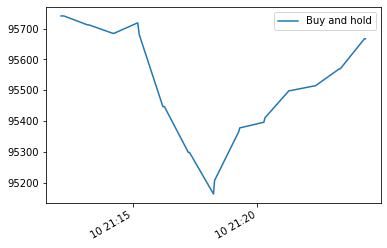

In [51]:
tars.plot()

In [49]:
tars.evaluate()

,Buy and hold
2021-08-10 21:12:00+00:00,95741.09
2021-08-10 21:13:00+00:00,95712.09
2021-08-10 21:14:00+00:00,95684.91
2021-08-10 21:15:00+00:00,95718.74
2021-08-10 21:16:00+00:00,95446.94
2021-08-10 21:17:00+00:00,95298.35


### Stop the bot

In [52]:
tars.stop()

 🤖 TARS : ✋ Stopped all strategies


### Trade with real money

To do that, just change the portfolio and trader objects as follow:
    
    - VirtualPortfolio should become CryptoPortfolio
    - VirtualCryptoTrader should become CryptoTrader
    
Update the boolean `validating` trader arguments to `False`, run Tars and let him do his job!

---

## What else?

Some tutorials are available in the `notebooks/tutorials`folder. So far:

    - One about historical data loading
    - Trading for real
    - Trading virtually
    

### Any Questions?

If you have any questions, feel free to contact me or put an issue on GitHub.

---